# DSCI 100 – Individual Planning Stage
### Adam Cheng

In [1]:
# Loading necessary R packages

library(tidyverse)
library(repr)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
# Loading datasets

players_url<-"https://raw.githubusercontent.com/adamcheng7/UBC-DSCI-100-Individual-Planning-Stage/refs/heads/main/data/players.csv"
sessions_url<-"https://raw.githubusercontent.com/adamcheng7/UBC-DSCI-100-Individual-Planning-Stage/refs/heads/main/data/sessions.csv"

players_data<-read_csv(players_url)|>clean_names()
sessions_data<-read_csv(sessions_url)|>clean_names()

# Reading datasets

head(players_data)
head(sessions_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


# Part 1: Data Description

## 1.1: Tidying `sessions.csv`

In [3]:
# Performing necessary wrangling for sessions.csv data

## Separating start_time into year, month, day, hour, and minute
sessions_separated<-sessions_data|>
    separate(start_time,into=c("start_day","start_month","start_year_time"),sep="/")|>
    separate(start_year_time,into=c("start_year","start_time"),sep=" ")|>
    separate(start_time,into=c("start_hour","start_minute"),sep=":")

## Separating end_time into year, month, day, hour, and minute
sessions_separated<-sessions_separated|>
    separate(end_time,into=c("end_day","end_month","end_year_time"),sep="/")|>
    separate(end_year_time,into=c("end_year","end_time"),sep=" ")|>
    separate(end_time,into=c("end_hour","end_minute"),sep=":")

## Rearranging columns and converting time variables to numeric
sessions_final<-sessions_separated|>
    select(hashed_email,
           start_year,start_month,start_day,start_hour,start_minute,
           end_year,end_month,end_day,end_hour,end_minute,
           original_start_time,original_end_time
          )|>
    mutate(across(start_year:end_minute,as.numeric))

head(sessions_final)

hashed_email,start_year,start_month,start_day,start_hour,start_minute,end_year,end_month,end_day,end_hour,end_minute,original_start_time,original_end_time
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024,6,30,18,12,2024,6,30,18,24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024,6,17,23,33,2024,6,17,23,46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024,7,25,17,34,2024,7,25,17,57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024,7,25,3,22,2024,7,25,3,58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024,5,25,16,1,2024,5,25,16,12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024,6,23,15,8,2024,6,23,17,10,1.71916e+12,1.71916e+12


## 1.2 Data Summary

In [4]:
# Disabling scientific notation for numeric values
options(scipen=999)

In [5]:
# Calculating summary statistics for players.csv

## Numeric summary

players_numeric_summary<-players_data|>
    select(where(is.numeric))|>
    map_df(~tibble(
        dataset_source="players.csv", # The name of the dataset associated with the variable
        type=mode(.), # Data type
        mean=mean(.,na.rm=TRUE), # Average or mean
        standad_deviation=sd(.,na.rm=TRUE), # Standard deviation
        min=min(.,na.rm=TRUE), # Minimum value, or the smallest value observed
        q25=quantile(.,0.25,na.rm=TRUE), # 25th percentile
        median=median(.,na.rm=TRUE), # 50th percentile, or median
        q75=quantile(.,0.75,na.rm=TRUE), # 75th percentile
        max=max(.,na.rm=TRUE), # Maximum value, or the highest value observed
        unique_values=n_distinct(.), # Total number of unique values
        values=sum(!is.na(.x)), # Total number of values
        missing_values=sum(is.na(.)), # Number of missing values
        mode=ifelse(n_distinct(.)==sum(!is.na(.)),NA,names(which.max(table(.)))) # Most frequent value, marked as "NA" if all values are unique
                    ),
           .id="variables")

## Categorical summary

players_categorical_summary<-players_data|> 
    select(where(is.character),where(is.logical))|>
    map_df(~tibble(
        dataset_source="players.csv", # The name of the dataset associated with the variable
        type=mode(.), # Data type
        unique_values=n_distinct(.), # Total number of unique values
        values=sum(!is.na(.)), # Total number of values
        missing_values=sum(is.na(.)), # Number of missing values
        mode=ifelse(n_distinct(.)==sum(!is.na(.)),NA,names(which.max(table(.))))  # Most frequent value, marked as "NA" if all values are unique
                  ),
           .id="variables")

## Creating look up table to match variables to their corresponding descriptions

lookup_players<-c("experience"="Experience level of the player in the game",
                   "subscribe"="Whether the player is subscribed (TRUE) or not subscribed (FALSE) to a game-related newsletter",
                   "hashed_email"="Email belonging to the player encrypted as codes, serving as unique identifiers",
                   "played_hours"="Total number of hours played in the server by the player",
                   "name"="Name of the player",
                   "gender"="Gender of the player",
                   "age"="Age of the player"
                  )

## Combining summaries and matching variables to their descriptions

players_summary<-bind_rows(players_numeric_summary,players_categorical_summary)|>
    mutate(variable_description=lookup_players[variables]
          )|>
    relocate(variable_description,.after=variables)

# Print message when code works

print("Calculated summary statistics for players.csv successfully, proceed to the next code cell")

[1] "Calculated summary statistics for players.csv successfully, proceed to the next code cell"


In [6]:
# Calculating summary statistics for sessions.csv

## Numeric summary

sessions_numeric_summary<-sessions_final|>
    select(where(is.numeric))|>
    map_df(~tibble(
        dataset_source="sessions.csv", # The name of the dataset associated with the variable
        type=mode(.), # Data type
        mean=mean(.,na.rm=TRUE), # Average or mean
        standad_deviation=sd(.,na.rm=TRUE), # Standard deviation
        min=min(.,na.rm=TRUE), # Minimum value, or the smallest value observed
        q25=quantile(.,0.25,na.rm=TRUE), # 25th percentile
        median=median(.,na.rm=TRUE), # 50th percentile, or median
        q75=quantile(.,0.75,na.rm=TRUE), # 75th percentile
        max=max(.,na.rm=TRUE), # Maximum value, or the highest value observed
        unique_values=n_distinct(.), # Total number of unique values
        values=sum(!is.na(.x)), # Total number of values
        missing_values=sum(is.na(.)), # Number of missing values
        mode=ifelse(n_distinct(.)==sum(!is.na(.)),NA,names(which.max(table(.)))) # Most frequent value, marked as "NA" if all values are unique
                    ),
           .id="variables")

## Categorical summary

sessions_categorical_summary<-sessions_final|>
    select(where(is.character))|>
    map_df(~tibble(
        dataset_source="sessions.csv", # The name of the dataset associated with the variable
        type=mode(.), # Data type
        unique_values=n_distinct(.), # Total number of unique values
        values=sum(!is.na(.)), # Total number of values
        missing_values=sum(is.na(.)), # Number of missing values
        mode=ifelse(n_distinct(.)==sum(!is.na(.)),NA,names(which.max(table(.))))  # Most frequent value, marked as "NA" if all values are unique
                  ),
           .id="variables")

## Creating look up table to match variables to their corresponding descriptions

lookup_sessions<-c("start_year"="The year when the session started",
                   "start_month"="The month when the session started",
                   "start_day"="The day when the session started",
                   "start_hour"="The hour when the session started",
                   "start_minute"="The minute when the session started",
                   "end_year"="The year when the session ended",
                   "end_month"="The month when the session ended",
                   "end_day"="The day when the session ended",
                   "end_hour"="The hour when the session ended",
                   "end_minute"="The minute when the session ended",
                   "original_start_time"="The original start time of the session in unix timestamp format",
                   "original_end_time"="The original end time of the session in unix timestamp format",
                   "hashed_email"="Email belonging to the player encrypted as codes, serving as unique identifiers"
                  )

## Combining summaries and matching variables to their descriptions

sessions_summary<-bind_rows(sessions_numeric_summary,sessions_categorical_summary)|>
    mutate(variable_description=lookup_sessions[variables]
          )|>
    relocate(variable_description,.after=variables)

# Print message when code works

print("Calculated summary statistics for sessions.csv successfully, proceed to the next code cell")

[1] "Calculated summary statistics for sessions.csv successfully, proceed to the next code cell"


In [7]:
# Binding summary statistics for both datasets to one uniform table

full_summary<-bind_rows(players_summary,sessions_summary)|>
    arrange(dataset_source,desc(type))

#full_summary

# Recommended by group TA to filter out variables and certain summary statistics not significant to the project

## If needed, remove below code for full summary statistics table

full_summary|>
    filter(!variables %in% c("experience","name","gender",
                             "start_year", "start_month", "start_day", "start_hour", "start_minute",
                             "end_year", "end_month", "end_day", "end_hour", "end_minute"))|>
    select(-mode)

variables,variable_description,dataset_source,type,mean,standad_deviation,min,q25,median,q75,max,unique_values,values,missing_values
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
played_hours,Total number of hours played in the server by the player,players.csv,numeric,5.845918,28.357343,0,0,0.1,0.6,223.1,43,196,0
age,Age of the player,players.csv,numeric,20.520619,6.174667,8,17,19.0,22.0,50.0,31,194,2
subscribe,Whether the player is subscribed (TRUE) or not subscribed (FALSE) to a game-related newsletter,players.csv,logical,NA,NA,NA,NA,NA,NA,NA,2,196,0
hashed_email,"Email belonging to the player encrypted as codes, serving as unique identifiers",players.csv,character,NA,NA,NA,NA,NA,NA,NA,196,196,0
original_start_time,The original start time of the session in unix timestamp format,sessions.csv,numeric,1719201355048.859863,3557491588.541189,1712400000000,1716240000000,1719200000000.0,1721890000000.0,1727330000000.0,649,1535,0
original_end_time,The original end time of the session in unix timestamp format,sessions.csv,numeric,1719195949119.373779,3552813133.913927,1712400000000,1716240000000,1719180000000.0,1721890000000.0,1727340000000.0,651,1533,2
hashed_email,"Email belonging to the player encrypted as codes, serving as unique identifiers",sessions.csv,character,NA,NA,NA,NA,NA,NA,NA,125,1535,0


## 1.3 Aggregate Data Summary

In [8]:
tibble(
    dataset=c("players.csv","sessions.csv"),
    observations=c(players_data|>nrow(),sessions_final|>nrow()), # Calculates total number of observations
    variables=c(players_data|>ncol(),sessions_final|>ncol()) # Calculates total number of variables (or columns in the dataset)
    )

dataset,observations,variables
<chr>,<int>,<int>
players.csv,196,7
sessions.csv,1535,13


## 1.4 Issues in the Data

1. **`sessions.csv`**:
    - `original_start_time` and `original_end_time` are measured in Unix time and displayed in scientific notations. Issues may arise when interpreting and converting those variables.
    - Two observations have missing data for end-time variables only.
2. **`players.csv`**:
    - Unobserved class imbalance may exist in the response variable `subscribe` for classification.
    - 75% of players have only 0.6 or fewer `played_hours`, significantly underrepresenting higher-hour players.

# Part 2: Questions
- **Broad question**: Question 1.
- **Specific question**: Can players' age, number of sessions played, average session played hours, and total hours played predict whether they are subscribed to a game-related newsletter?

- **How the data addresses the question**:
    - The data provides the necessary observations with known classes and predictors associated with `subscribe` for applying and validating the classification models used to answer the question.
- **Wrangling plan**:
    1.  Compute new variables in `sessions.csv`:
        - **`average_session_played_hours`**: Using the `lubridate` package, convert the start and end time variables to uniform date variables and then calculate their difference in hours. Lastly, group by `hashed_email` and use `summarize` and `mean()` to find the average session hours played for each player.
        - **`sessions_played`**: In the same `summarize` function, use `n()` to find the total number of sessions played by each player.
    2. Use `full_join` and `join_by(hashed_email)` to merge `sessions.csv` with `players.csv`. The merged dataset would be ready for classification.

# Part 3: Exploratory Data Analysis and Visualization

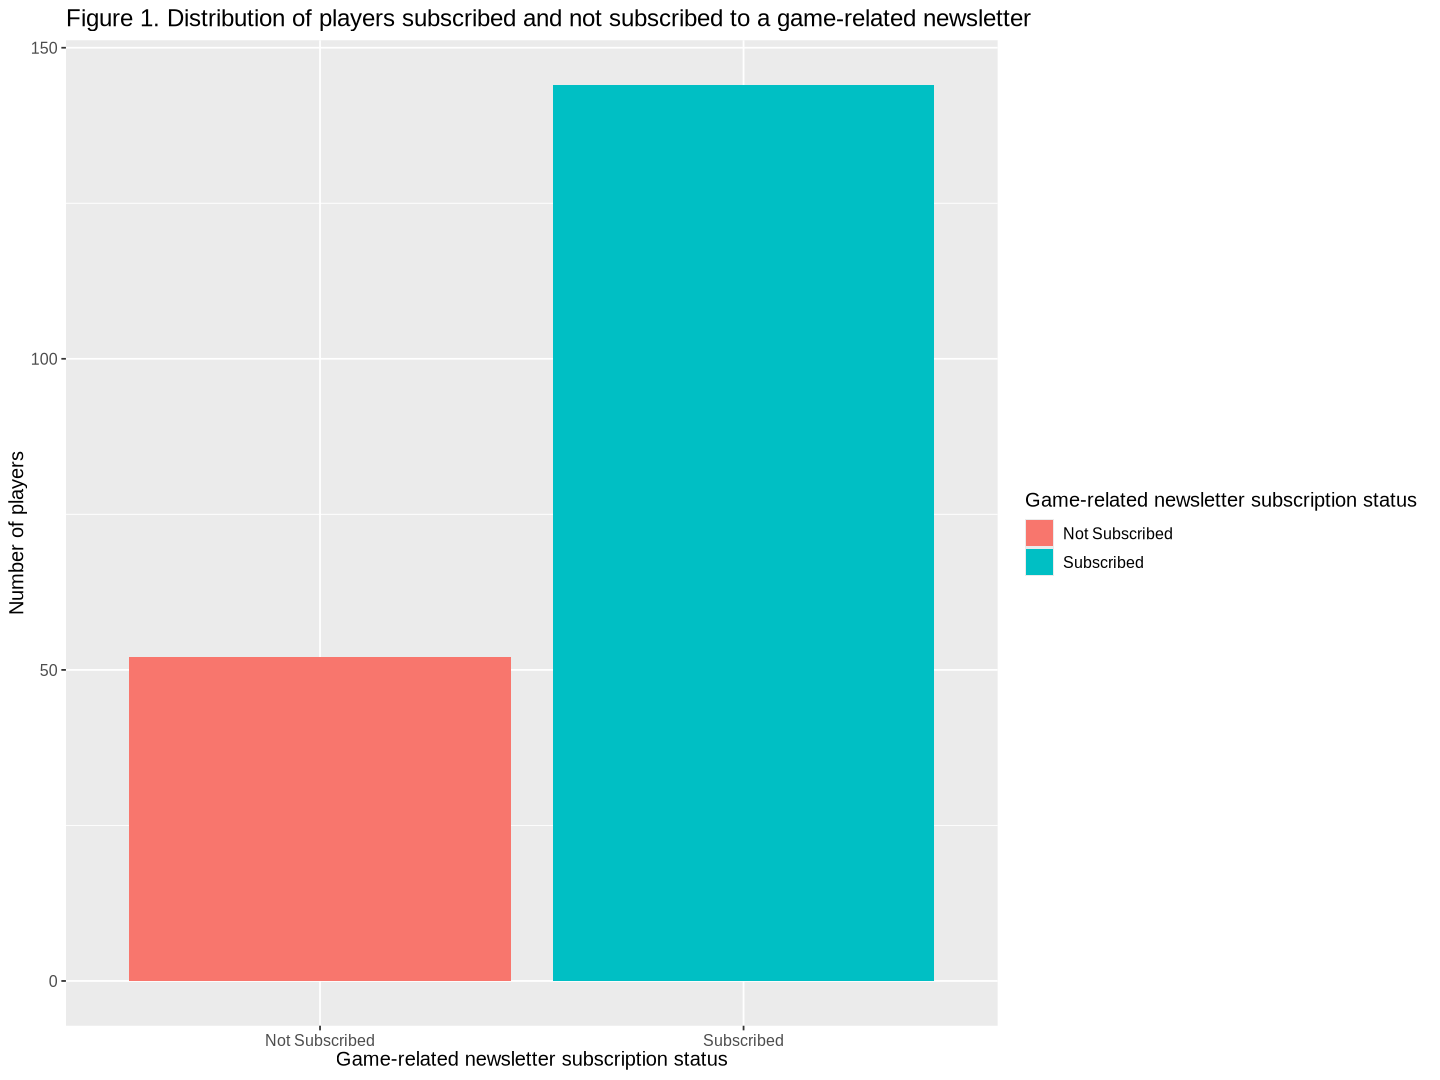

In [9]:
# Bar chart for displaying the distribution of players subscribed and not subscribed to a game-related newsletter

options(repr.plot.width=12,repr.plot.height=9)

players_data|>ggplot(aes(
                        x=fct_recode(as_factor(subscribe),"Subscribed"="TRUE","Not Subscribed"="FALSE"),
                        fill=fct_recode(as_factor(subscribe),"Subscribed"="TRUE","Not Subscribed"="FALSE")
                        )
                    )+
    geom_bar()+
    labs(
        x="Game-related newsletter subscription status",
        y="Number of players",
        title="Figure 1. Distribution of players subscribed and not subscribed to a game-related newsletter",
        fill="Game-related newsletter subscription status"
        )+
    theme(text=element_text(size=12))

1. **Insight**: Class imbalance present for `subscribe`, i.e., significantly more subscribers than non-subscribers relative to all players. Depending on the sampling method, voluntary response bias may exist.

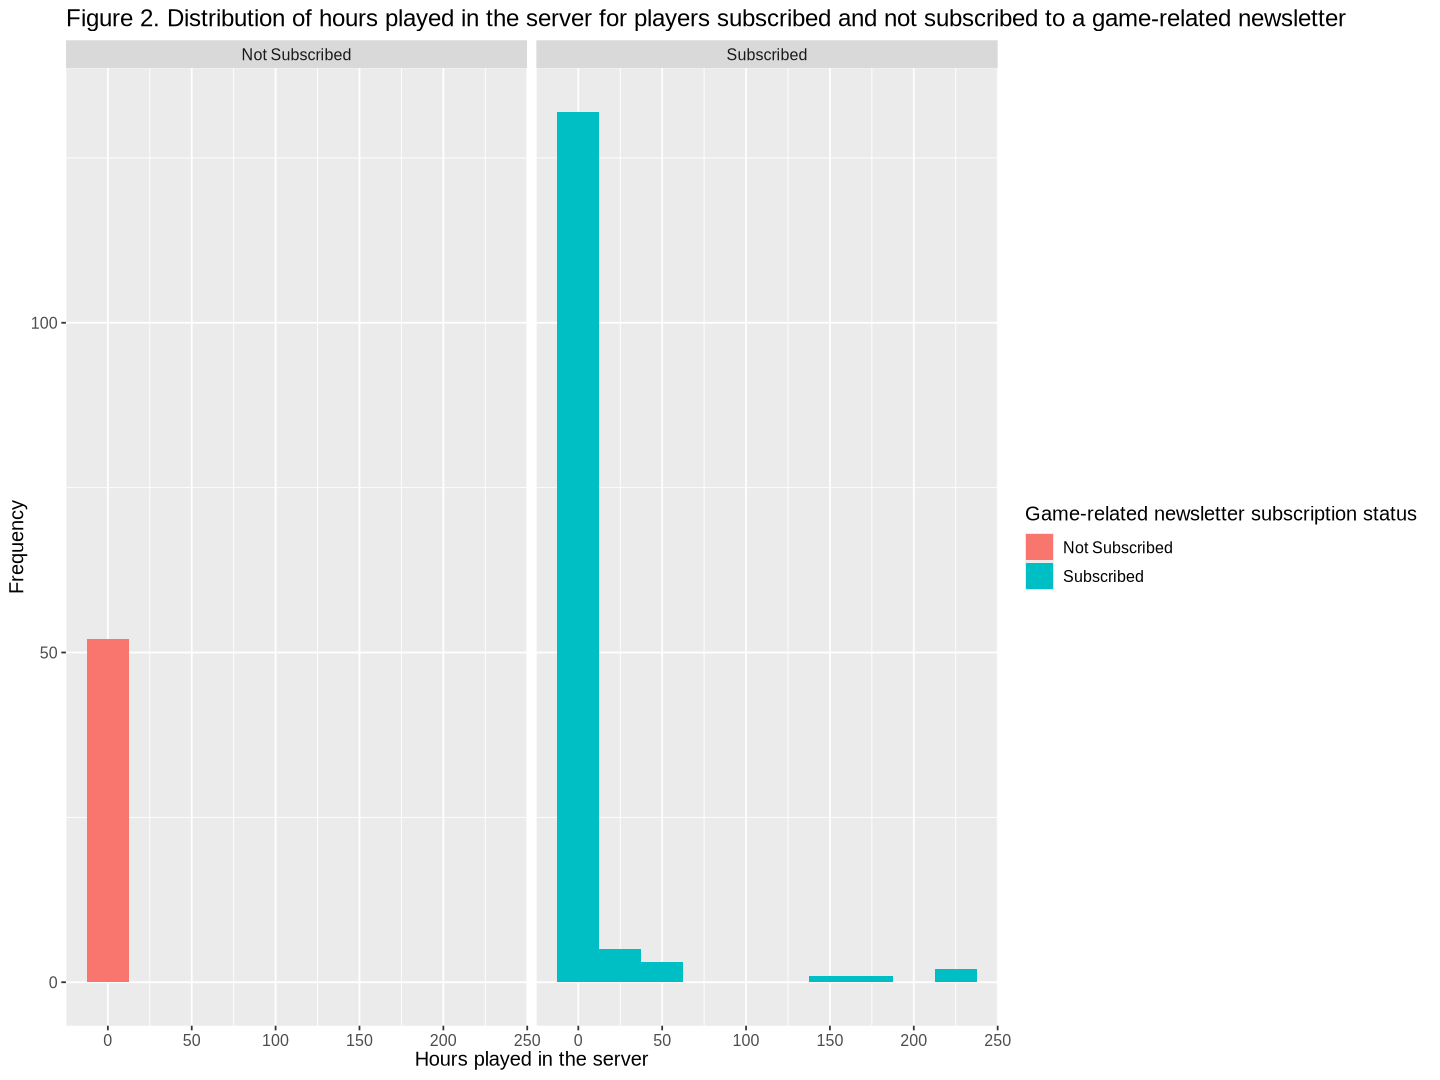

In [10]:
# Histogram for displaying distribution of played_hours for players subcribed and not subsribed to a game-related newsletter

players_data|>ggplot(aes(x=played_hours,fill=fct_recode(as_factor(subscribe),"Subscribed"="TRUE","Not Subscribed"="FALSE")))+
    geom_histogram(binwidth=25)+
    facet_grid(cols=vars(fct_recode(as_factor(subscribe),"Subscribed"="TRUE","Not Subscribed"="FALSE")))+
    labs(
        x="Hours played in the server",
        y="Frequency",
        title="Figure 2. Distribution of hours played in the server for players subscribed and not subscribed to a game-related newsletter",
        fill="Game-related newsletter subscription status"
        )+
    theme(text=element_text(size=12))

2. **Insight**: Significant concentration in the lower-hours range (i.e. 0-12.5) of `played_hours`. Little and no representation of higher-hour players can harm prediction accuracy.

# Part 4: Methods and Planning

- **Method**: $K$-NN Classification.
    - Classification is appropriate because the question proposed is a predictive question for a categorical variable.
- **Assumptions**:
    - All predictors are standardized.
    - Missing data are random.
    - Classes are roughly balanced.
- **Limitations**:
    - Requires considerable computational power for scenarios like using a large number of folds during cross-validation.
    - Sensitive to noisy data and the choice of neighbors ($K$).
- **Model selection and data processing (sequential order)**:
    1. Split the merged dataset:
       - 75% training.
       - 25% testing.
    3. Create `recipe`:
       - Specify the response variable, predictors, and training data.
       - Center and scale all predictors.
    4. Split training set, create a workflow, and tune $K$:
       - 5-fold cross-validation.
       - $K$ range of 1-150 in intervals of 3.
    5. Collect metrics and plot estimated accuracy ($EA$) vs. $K$s.
       - Choose the best $K$ with high $EA$ and minimal variance in $EA$ for adjacent $K$s.
    6. Apply tuned $K$ to a new model specification and predict using testing data.
    7. Compute for accuracy and confusion matrices to evaluate model performance.